<a href="https://colab.research.google.com/github/Sam120900/Colab-Notebooks/blob/main/ConvNets2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


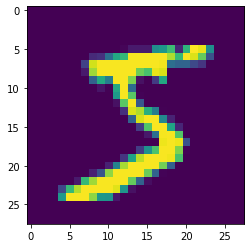

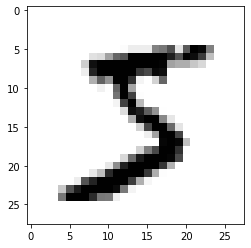

In [ ]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
#before normalization 
print(x_train[0])
#print(x_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
#normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

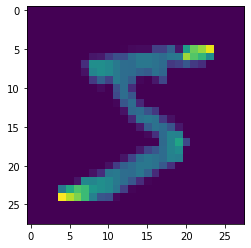

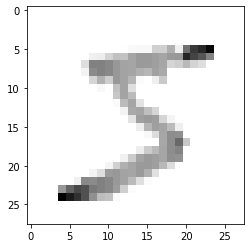

In [ ]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

#you will see that aftr normalization, the colors have got less sharper

In [ ]:
print(y_train[0])

5


In [ ]:
#reshape images to include channel
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)

print("Training sample dimentions: ", x_train.shape)
print("Testing sample dimentions: ", x_test.shape)

Training sample dimentions:  (60000, 28, 28, 1)
Testing sample dimentions:  (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Activation, Dropout

model = tf.keras.models.Sequential()

#first layer
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:])) #we can also write (28,28,1) for input shape
model.add(Activation("relu")) #to make it non linear. any value < 0 will be dropped. will not be allowed to go to the next layer
model.add(MaxPooling2D(pool_size=(2,2))) #takes the maximum value of a 2x2 matrix of the previous layer

#second conv layer
model.add(Conv2D(64, (3,3))) #we can also write (28,28,1) for input shape
model.add(Activation("relu")) #to make it non linear. any value < 0 will be dropped. will not be allowed to go to the next layer
model.add(MaxPooling2D(pool_size=(2,2))) #takes the maximum value of a 2x2 matrix of the previous layer

#third layer
model.add(Conv2D(64, (3,3))) #we can also write (28,28,1) for input shape
model.add(Activation("relu")) #to make it non linear. any value < 0 will be dropped. will not be allowed to go to the next layer
model.add(MaxPooling2D(pool_size=(2,2))) #takes the maximum value of a 2x2 matrix of the previous layer

#before final layer, this must be flattened (2D -> 1D convertion)
model.add(Flatten())

#fully connected layers
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

#last layer. should have the same number of inputs as the number of outputs we have
model.add(Dense(10))
model.add(Activation("softmax")) #activation changed. to get the class probabilities.

#softmax for multi class
#sigmoid for binary class


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_7 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_8 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 35s 26ms/step - loss: 0.3436 - accuracy: 0.8918 - val_loss: 0.1387 - val_accuracy: 0.9563
Epoch 2/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1080 - accuracy: 0.9671 - val_loss: 0.1151 - val_accuracy: 0.9646
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0754 - accuracy: 0.9762 - val_loss: 0.0990 - val_accuracy: 0.9696
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0686 - val_accuracy: 0.9791
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0612 - val_accuracy: 0.9812


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Testing set Loss (10,000 sample data set): ", test_loss)
print("Testing set accuracy: ", test_accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.0588 - accuracy: 0.9825
Testing set Loss (10,000 sample data set):  0.05877241864800453
Testing set accuracy:  0.9825000166893005


In [ ]:
predictions = model.predict([x_test])

In [ ]:
print(predictions)
print(predictions.shape)

[[1.3793751e-08 3.8068723e-05 2.2774773e-05 ... 9.9989164e-01
  2.7942537e-08 1.4947161e-05]
 [6.0172797e-06 3.7954810e-06 9.9998343e-01 ... 3.2953110e-06
  2.5060510e-06 1.4584116e-07]
 [2.3961686e-08 9.9989748e-01 1.9031295e-06 ... 3.6834474e-05
  1.1534944e-06 1.0539910e-06]
 ...
 [1.6645220e-10 1.1786547e-08 2.6095377e-09 ... 2.1403750e-06
  2.9410359e-09 3.0117330e-06]
 [7.6720380e-06 6.1032250e-07 6.1817990e-10 ... 2.2496469e-07
  6.7895085e-06 3.8399999e-06]
 [6.0570484e-05 1.8366650e-06 7.2077582e-06 ... 6.9059993e-08
  3.4935774e-06 8.2864247e-08]]
(10000, 10)


In [ ]:
print(np.argmax(predictions[0]))

7


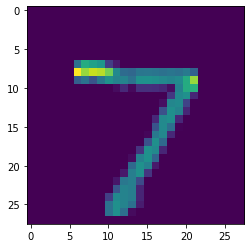

In [ ]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
print(np.argmax(predictions[128]))

8


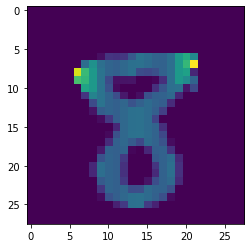

(28, 28, 1)


In [ ]:
plt.imshow(x_test[128])
plt.show()

#print(x_test[128].shape)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('C:\\Users\\94716\\Desktop\\420\\my projects\\number 8.png')

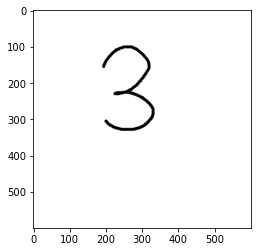

(600, 600, 3)


In [ ]:
plt.imshow(img)
plt.show()

print(img.shape)

In [ ]:
#first we need to convert into grey 
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#the image we have given in is too large. we need to reshape
resized = cv2.resize(grey, (28, 28), interpolation=cv2.INTER_AREA)

In [ ]:
print(img.shape) #the rgb image size
print(grey.shape) #the greyscale image size
print(resized.shape) #the reshapes image size

(600, 600, 3)
(600, 600)
(28, 28)


(28, 28)


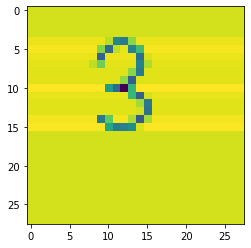

In [ ]:
#now we need to normalize this too
img_norm = tf.keras.utils.normalize(resized, axis=1)
print(img_norm.shape)

plt.imshow(img_norm)
plt.show()

In [ ]:
#now we need to convert the 28x28 image we have, into 1x28x28x1, because that's what our layer will accept
img_final = np.array(img_norm).reshape(-1, 28, 28, 1)
print(img_final.shape)

(1, 28, 28, 1)


In [ ]:
#inverting the image
img_final = cv2.bitwise_not(img_final)
#now let's check if he model will work
predictions = model.predict(img_final)

In [ ]:
print(predictions)

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.5407008e-11 0.0000000e+00
  2.6913533e-14 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
np.argmax(predictions)

1